In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import optimizers
import scipy


from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

Using TensorFlow backend.


In [ ]:
input_shape=(150,150,3)
img_width=150
img_height=150


nb_train_samples=2000
nb_validation_samples=1000
batch_size=32
epochs=10

train_data_dir='/content/drive/My Drive/Colab Notebooks/scrap_img/train'
validation_data_dir='/content/drive/My Drive/Colab Notebooks/scrap_img/test'

In [ ]:
#rescaling data
datagen=ImageDataGenerator(rescale=1./255)

train_generator=datagen.flow_from_directory(
         train_data_dir,
         target_size=(img_width,img_height),
         batch_size=8,
         class_mode='categorical')

validation_generator=datagen.flow_from_directory(
         validation_data_dir,
         target_size=(img_width,img_height),
         batch_size=16,
         class_mode='categorical')


Found 308 images belonging to 3 classes.
Found 82 images belonging to 3 classes.


In [ ]:
#model building
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

#flatten layer
model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)       

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#augmentation
train_datagen_augmenteted=ImageDataGenerator(
       rescale=1./255,
       shear_range=0.2,
       zoom_range=0.2,
       rotation_range=30,
       horizontal_flip=True)

In [ ]:
train_datagen_augmenteted=train_datagen_augmenteted.flow_from_directory(
                train_data_dir,
                target_size=(img_width,img_height),
                batch_size=8,
               class_mode='categorical',)

Found 308 images belonging to 3 classes.


In [ ]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size)

Epoch 1/10
62/62 [==============================] - 250s 4s/step - loss: 0.9109 - accuracy: 0.5225 - val_loss: 0.9296 - val_accuracy: 0.6455
Epoch 2/10
62/62 [==============================] - 4s 57ms/step - loss: 0.6023 - accuracy: 0.6768 - val_loss: 0.4865 - val_accuracy: 0.6854
Epoch 3/10
62/62 [==============================] - 4s 57ms/step - loss: 0.5247 - accuracy: 0.7480 - val_loss: 0.3804 - val_accuracy: 0.7606
Epoch 4/10
62/62 [==============================] - 4s 59ms/step - loss: 0.4692 - accuracy: 0.8074 - val_loss: 0.4382 - val_accuracy: 0.7559
Epoch 5/10
62/62 [==============================] - 3s 56ms/step - loss: 0.4681 - accuracy: 0.8258 - val_loss: 0.5715 - val_accuracy: 0.7535
Epoch 6/10
62/62 [==============================] - 4s 63ms/step - loss: 0.4846 - accuracy: 0.8496 - val_loss: 0.4336 - val_accuracy: 0.6966
Epoch 7/10
62/62 [==============================] - 4s 58ms/step - loss: 0.4694 - accuracy: 0.8053 - val_loss: 0.4295 - val_accuracy: 0.7488
Epoch 8/10
62

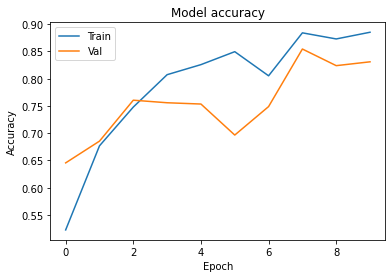

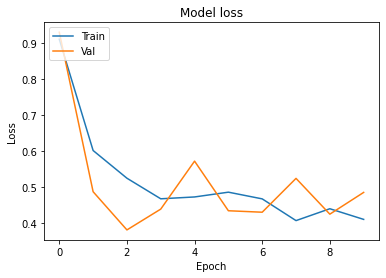

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
pyplot.legend(['Train', 'Val'], loc='upper left')
pyplot.show()

# Plot training & validation loss values
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Model loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Val'], loc='upper left')
pyplot.show()

Approach 2

In [ ]:
#model building
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

#flatten layer
model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#model saving
model.save('variation_dropout.h5')

In [ ]:
#augmentation
train_datagen_augmenteted=ImageDataGenerator(
       rescale=1./255,
       shear_range=0.2,
       zoom_range=0.2,
       rotation_range=30,
       horizontal_flip=True)

In [ ]:
train_datagen_augmenteted=train_datagen_augmenteted.flow_from_directory(
                train_data_dir,
                target_size=(img_width,img_height),
                batch_size=8,
               class_mode='categorical',)

Found 308 images belonging to 3 classes.


In [ ]:
checkpoint = ModelCheckpoint("variation_dropout.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,early])

Epoch 1/10
62/62 [==============================] - 4s 64ms/step - loss: 0.1609 - accuracy: 0.9447 - val_loss: 0.3610 - val_accuracy: 0.8427

Epoch 00001: val_accuracy did not improve from 0.85437
Epoch 2/10
62/62 [==============================] - 4s 59ms/step - loss: 0.0821 - accuracy: 0.9736 - val_loss: 0.5353 - val_accuracy: 0.8521

Epoch 00002: val_accuracy did not improve from 0.85437
Epoch 3/10
62/62 [==============================] - 4s 57ms/step - loss: 0.1060 - accuracy: 0.9570 - val_loss: 1.1275 - val_accuracy: 0.8028

Epoch 00003: val_accuracy did not improve from 0.85437
Epoch 4/10
62/62 [==============================] - 4s 61ms/step - loss: 0.0988 - accuracy: 0.9533 - val_loss: 0.2118 - val_accuracy: 0.8333

Epoch 00004: val_accuracy did not improve from 0.85437
Epoch 5/10
62/62 [==============================] - 3s 56ms/step - loss: 0.0639 - accuracy: 0.9675 - val_loss: 0.1598 - val_accuracy: 0.8404

Epoch 00005: val_accuracy did not improve from 0.85437
Epoch 6/10
62/6

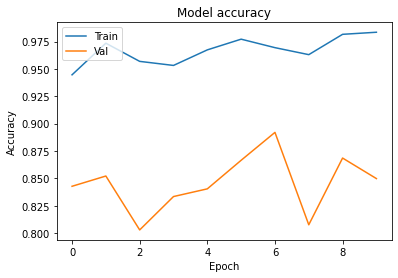

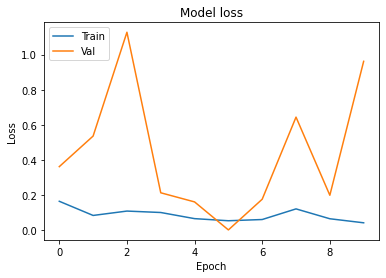

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()